## poisson intervals distribution

mean:100.0867
max:1006.0


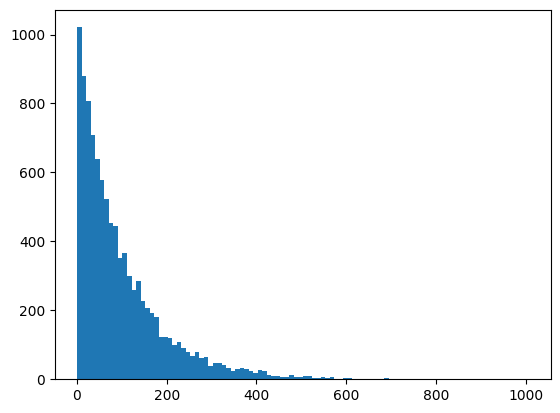

In [459]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

prob = []
for i in range(10000):
    prob.append(np.ceil(np.random.exponential(100)))

plt.hist(prob,100)

print("mean:" + str(np.mean(prob)) +"\nmax:" + str(np.max(prob)))
